In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#<font color='blue'> Gradient Descent Visualization

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

##<font color='blue'> An Example with Contour Plots

In [ ]:
# here we generate many equally spaced points
x1 = np.linspace(-10.0, 10.0, 201)
x2 = np.linspace(-10.0, 10.0, 201)

In [ ]:
x1

In [ ]:
# here we make an objective function
X1, X2 = np.meshgrid(x1, x2)
Y = np.sqrt(X1**2/9 + X2**2/4)

In [ ]:
X1

array([[-10. ,  -9.9,  -9.8, ...,   9.8,   9.9,  10. ],
       [-10. ,  -9.9,  -9.8, ...,   9.8,   9.9,  10. ],
       [-10. ,  -9.9,  -9.8, ...,   9.8,   9.9,  10. ],
       ...,
       [-10. ,  -9.9,  -9.8, ...,   9.8,   9.9,  10. ],
       [-10. ,  -9.9,  -9.8, ...,   9.8,   9.9,  10. ],
       [-10. ,  -9.9,  -9.8, ...,   9.8,   9.9,  10. ]])

Here we have the function:

$$F(x_1,x_2):=\sqrt{\frac{x_1^2}{9}+\frac{x_2^2}{4}}$$

What shape is implied by the equation

$$\frac{x_1^2}{9}+\frac{x_2^2}{4}=k$$

Here the function is $$f(x_1,x_2):=\frac{(x_1)^2}{9}+\frac{(x_2)^2}{4}$$

The level curve is the geometric locus of points $(x_1,x_2)$ such that 

$$f(x_1,x_2)=l$$


The gradient of $f$ is labeled by $\nabla(f)$ and is the vector of partial derivatives with respect to $x1$ and $x2$

$$\nabla(f):=\left(\frac{\partial{f}}{\partial{x1}},\frac{\partial{f}}{\partial{x2}}\right)=\left(\frac{2x1}{9},\frac{x2}{2}\right)$$

<ipython-input-5-394b0448442b>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('coolwarm')


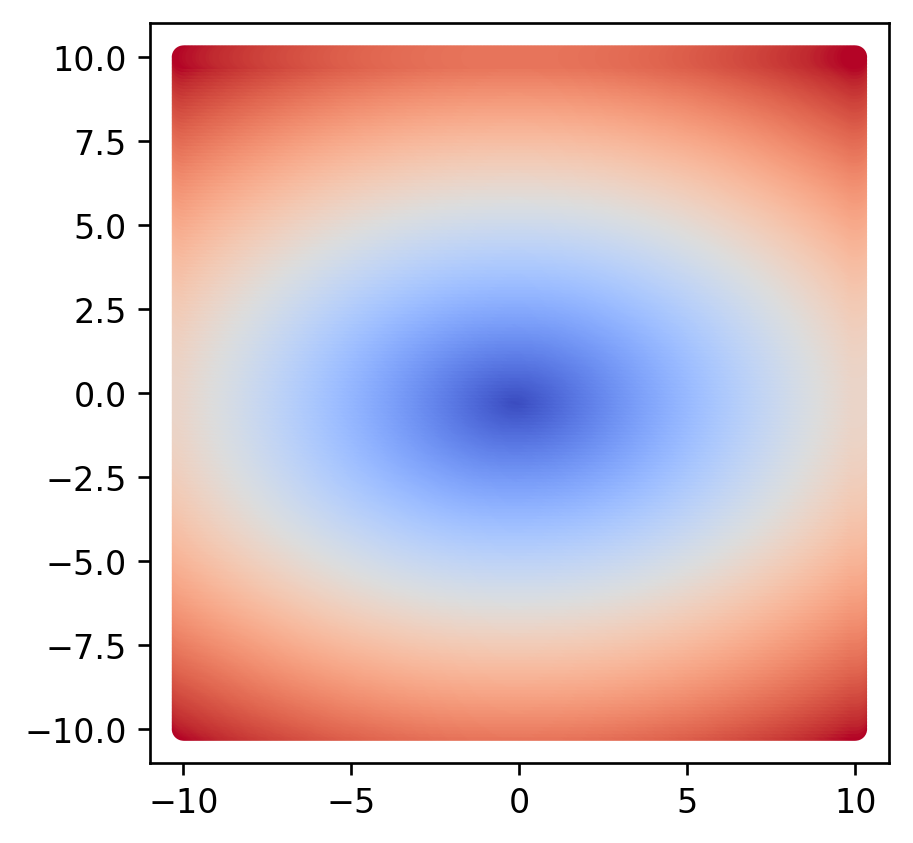

In [ ]:
fig = plt.figure(figsize=(4,4))
ax = plt.gca() #you first need to get the axis handle
ax.set_aspect(1) 
cm = plt.cm.get_cmap('coolwarm')
plt.scatter(X1, X2, c=Y, cmap=cm)
plt.show()

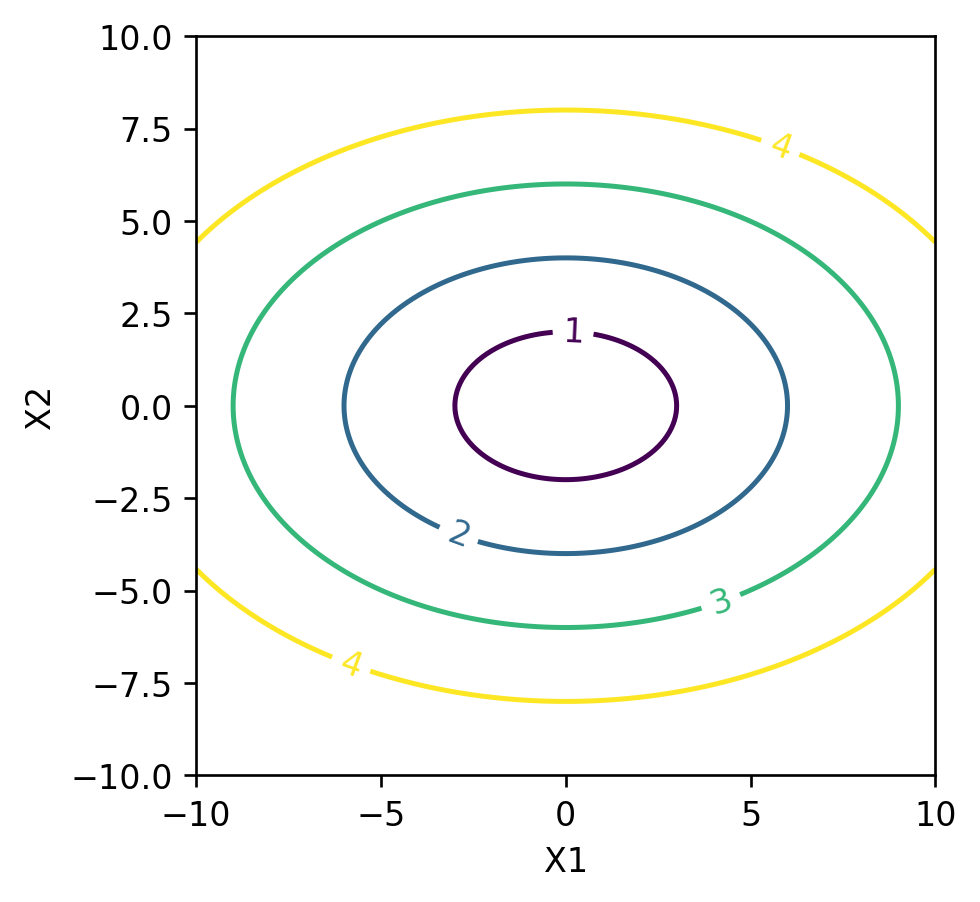

In [ ]:
fig = plt.figure(figsize=(4, 4))
ax = plt.gca() #you first need to get the axis handle
ax.set_aspect(1) 
levels = [1,2,3,4]
cp = plt.contour(X1, X2, Y,levels) # here we show some of the level curves
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

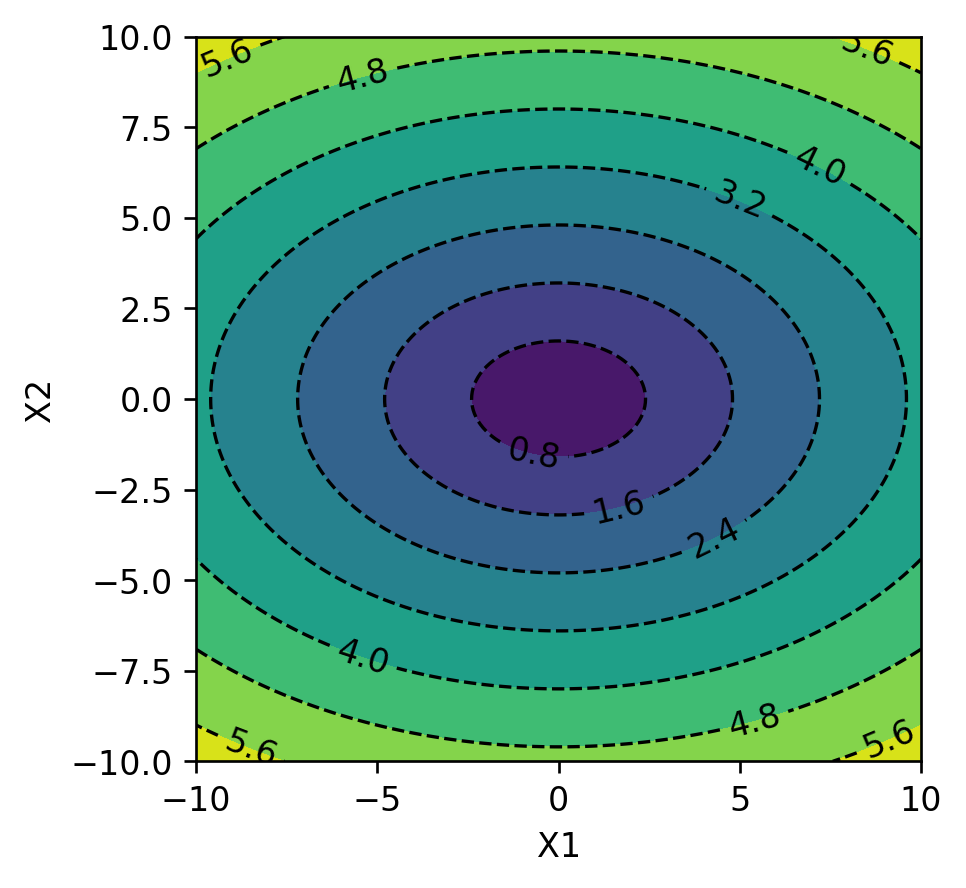

In [ ]:
plt.figure(figsize=(4,4))
ax = plt.gca() #you first need to get the axis handle
ax.set_aspect(1) 
cp = plt.contour(X1, X2, Y, colors='black', linestyles='dashed', linewidths=1)
plt.clabel(cp, inline=1, fontsize=10)
cp = plt.contourf(X1, X2, Y, )
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

##<font color='blue'> The Gradient Descent

We want to minimize a cost function that depends on some coefficients. An example in 2-D is

$$L(c_1,c_2): = \frac{1}{n}\sum (y_i - c_1\cdot x_{i1} - c_2\cdot x_{i2})^2$$

Here we have a vector $$\vec{c}:=(c_1,c_2)$$

We can think of the vector $\vec{c}$ having (in this case) two components and a perturbation of $\vec{c}$ in some direction such as $\vec{v}.$

We consider the function $g(t):=L(\vec{c}+t\cdot \vec{v})$ we get some important ideas:

i. if $\vec{c}$ is ideal for the cost then $t=0$ is min of the function $g$ and so $g'(0)=0.$

ii. if $\vec{c}$ is not minimizing the cost then we want to decrease the function $g$

Here we have that $$g'(t):= \nabla L \cdot \vec{v}$$ should be negative (because we want to decrease $g$) and we get a good outcome if 

$$\vec{v}:= - \nabla L$$

This means that the coefficients should be updated in the negative direction of the gradient.

We can choose a learning rate $t_n$ based on 

##<font color='blue'> The Loss Function and its Gradient for n Observations
$$L(\beta_1,\beta_2):=\sum_{i=1}^{n}(y_i-\beta_1\cdot x_{i1} -\beta_2\cdot x_{i2})^2$$

$$\frac{\partial{L}}{\partial \beta_1}=\sum_{i=1}^{n} 2\cdot (y_i-\beta_1\cdot x_{i1} -\beta_2\cdot x_{i2})\cdot (-x_{i1})$$

##<font color='blue'> A 2D Example with Partial Derivatives

If 

$$L(c_1,c_2) = (y-c_1\cdot x_1-c_2\cdot x_2)^2$$

What are the partial derivatives of $L$ with respect to $c1$ and $c2$?

$$\frac{\partial{L}}{\partial{c_1}}= 2\cdot(y-c_1\cdot x_1-c_2\cdot x_2)\cdot (-x_1)$$

$$\frac{\partial{L}}{\partial{c_2}}= 2\cdot(y-c_1\cdot x_1-c_2\cdot x_2)\cdot (-x_2)$$

##<font color='blue'> Data Application with Gradient Descent

In [4]:
data = pd.read_csv('drive/MyDrive/Data Sets/Advertising.csv')

In [ ]:
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


## Machine Learning -> Linear Case

Predict Sales = c1*TV +c2*Radio +c3* Newspaper

We want that the difference between Sales and Predict Sales to be as small as possible -> Minimize the sum of squared errors

BIG IDEA: we start with a random choice of c1, c2 and c3 and then iteratively update them.

In [5]:
# np.column_stack is very useful to concatenate two(or more) columns from the data frame into a matrix  
y = data['Sales']
x = np.column_stack((data['TV'], data['Radio'], data['Newspaper']))
 
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [ ]:
x

$$L(\beta_1,\beta_2):=\sum_{i=1}^{n}(y_i-\beta_1\cdot x_{i1} -\beta_2\cdot x_{i2})^2$$

$$\frac{\partial{L}}{\partial \beta_1}=\sum_{i=1}^{n} 2\cdot (y_i-\beta_1\cdot x_{i1} -\beta_2\cdot x_{i2})\cdot (-x_{i1})$$

## No Intercept Term

We make sure we scale x by the z-scores and then we subtract the mean of $y$,i.e. $\bar{y}$, from the y values.

In [ ]:
np.mean(y)

14.0225

In [ ]:
# 
y = y - np.mean(y)

In [ ]:
np.mean(y) # essentially a zero mean

-8.526512829121202e-16

In [ ]:
# here we can guess some weights (aka coefficients)
w = [10,20]

In [ ]:
x.dot(w) # this is the correct matrix - vector product

In [ ]:
errors = y - x.dot(w)

## An Equivalent Approach

In [6]:
# augment x with a columns of 1's
x = np.column_stack([np.ones(len(x)),x])

In [ ]:
pd.DataFrame(data=x)

,0,1,2,3
0,1.0,0.969852,0.981522,1.778945
1,1.0,-1.197376,1.082808,0.669579
2,1.0,-1.516155,1.528463,1.783549
3,1.0,0.052050,1.217855,1.286405
4,1.0,0.394182,-0.841614,1.281802
...,...,...,...,...
195,1.0,-1.270941,-1.321031,-0.771217
196,1.0,-0.617035,-1.240003,-1.033598
197,1.0,0.349810,-0.942899,-1.111852
198,1.0,1.594565,1.265121,1.640850


## Matrix-Vector product

$$\text{x.dot(w)}\overset{\Delta}{=}w_1\cdot \text{col}_1(x)+w_2\cdot \text{col}_2(x)+...w_p\cdot\text{col}_p(x)$$

## Linear Model with Intercept Term

$$\text{Linear Model w/ Intercept}\overset{\Delta}{=}w_0\cdot 1+w_1\cdot \text{col}_1(x)+w_2\cdot \text{col}_2(x)+...w_p\cdot\text{col}_p(x)$$

In [ ]:
# here I would like to do a weighted mean or just a linear combination of the columns of x
# w1*x1 +w2*x2
# we can initialize the vector of the weights randomly
w = np.random.uniform(size=4)
x.dot(w) # we just made a linear combination of the columns in x by using the coefficients in w

array([ 3.18056954e+00,  6.11939030e-01,  1.51530997e+00,  2.14244426e+00,
        1.65307769e+00,  1.74511485e+00, -3.08846788e-01, -5.63313153e-01,
       -2.39768251e+00,  1.10435949e-01, -8.62049672e-01,  6.37742991e-02,
        1.17238737e+00, -1.23288128e+00,  1.89188589e+00,  2.45577161e+00,
        3.54664411e+00,  3.13029163e+00, -7.16608423e-01,  8.32665718e-02,
        2.19102625e+00,  5.94235571e-01, -4.92385642e-02,  9.11167195e-01,
       -9.69332750e-01,  6.16521003e-01, -8.76929348e-02,  8.75824276e-01,
        1.20516226e+00,  9.92732141e-02,  2.44479874e+00,  4.14887454e-01,
       -4.58661719e-01,  2.62506989e-01, -1.39141228e+00,  4.28425023e-01,
        1.04377870e+00,  1.14680944e+00, -1.12762297e-01,  1.65005272e+00,
        1.03553465e+00,  1.37022337e+00,  7.56214790e-01,  5.24842934e-01,
        3.78820868e-02,  7.96136975e-01, -8.86894192e-02,  1.29897764e+00,
        1.83656518e+00, -2.00127813e-01,  6.66409812e-01, -1.30488849e+00,
        1.95412146e+00,  

In [ ]:
# we can inspect the dimensionality of y
y.shape

(200,)

## Implementation of the Gradient Function and the Loss

In [ ]:
# this is the calculation of the gradient for the Ridge Objective function
def gradient_ridge(beta,x,y): # we defined a function that computes the gradient of the objective function
    n = len(y) # the number of observations
    y_hat = x.dot(beta).flatten() # we create the linear combination of the features in x by using the weights in beta
    error = (y - y_hat) # calculation of residuals
    ridge_objective = (1.0 /n) * np.sum(error**2) + alpha*np.sum(beta**2)
    gradient = -(2.0 /n) * error.dot(x) + alpha*2*beta # the calculation is straight forward
    return gradient, ridge_objective

## RIDGE Regression

The objective function is

$$\text{Loss}:=\text{MSE} + \alpha\cdot \sum_{j=1}^{p}\beta_j^2$$

and its gradient is:

$$\frac{\partial}{\partial{\beta_j}}\text{Loss}=\frac{\partial}{\partial{\beta_j}}\text{MSE} + 2\cdot\alpha\cdot \beta_j$$


In [7]:
# this is the calculation of the gradient for the MSE
def gradient_mse(beta,x,y): # we defined a function that computes the gradient of the objective function
    n = len(y) # the number of observations
    y_hat = x.dot(beta).flatten() # we create the linear combination of the features in x by using the weights in beta
    error = (y - y_hat) # calculation of residuals
    mse = (1.0 /n) * np.sum(error**2) 
    gradient = -(2.0 /n) * error.dot(x)  # the calculation is straight forward
    return gradient, mse

In [10]:
w = [10,20,30,40]

In [11]:
# let's test the function
grad, loss = gradient_mse(w,x,y)

In [ ]:
grad

array([17.44920684, 56.34461674, 72.92079019])

In [ ]:
loss

1831.8876671258863

In [ ]:
lr = 0.02
new_w = w - lr*grad

In [ ]:
new_w

array([ 9.65101586, 18.87310767, 28.5415842 ])

In [ ]:
gradient_mse(new_w,x,y) # there is progress

(array([16.46247932, 53.01971635, 69.16634655]), 1660.7383696663244)

In [ ]:
# let's do an experiment
# let's update w in the direction of grad -> we have to decide on a learning rate
# i.e. how much we  travel in the direction of the gradient
lr = 0.01
new_w = w - lr*grad

In [ ]:
new_w

array([2.0381316 , 2.99778547])

In [ ]:
# let's check the loss at the new set of weights
new_grad, new_loss = gradient_mse(new_w,x,y)

In [ ]:
new_loss

6.32163580736815

In [ ]:
alpha=0.01
w = np.random.uniform(size=4) # a very imprecise guess to initialize the coefficients
lr = .01 # the learning rate
tolerance = 1e-6
 
old_w = []
mse = []

In [ ]:
w

array([11.30999012, 16.3104529 , 10.59457363])

In [ ]:
# Perform Gradient Descent
iterations = 1
maxiter = 10000
loss_all = []
for i in range(maxiter):
    gradient, loss_temp = gradient_ridge(w, x, y)
    new_w = w - lr * gradient # here we update the coefficients in the direction of the negative gradient
    loss_all.append(loss_temp)
    # Print error every 10 iterations
    if iterations % 100 == 0:
        print("Iteration: %d - Mean Squarred Error: %.4f" % (iterations, loss_temp))
        old_w.append(new_w)
        mse.append(loss_temp)
 
    # Stopping Condition
    if np.sum(abs(new_w - w)) < tolerance:
        print('The Gradient Descent Algorithm has converged')
        break
 
    iterations += 1
    w = new_w
 
print('w =', w)

Iteration: 100 - Mean Squarred Error: 8.3968
Iteration: 200 - Mean Squarred Error: 5.0315
Iteration: 300 - Mean Squarred Error: 4.9624
Iteration: 400 - Mean Squarred Error: 4.9603
Iteration: 500 - Mean Squarred Error: 4.9602
Iteration: 600 - Mean Squarred Error: 4.9602
Iteration: 700 - Mean Squarred Error: 4.9602
Iteration: 800 - Mean Squarred Error: 4.9602
The Gradient Descent Algorithm has converged
w = [ 1.38836625e+01  3.88135890e+00  2.76191320e+00 -9.59561269e-03]


In [ ]:
mse_all[-1]

4.960200883633443

In [ ]:
all_ws = np.array(old_w)
mse = []
# Just for visualization
mse.append(20)
mse.append(10)
mse.append(5)
mse.append(4)
mse.append(3)
 
levels = np.sort(np.array(mse))

In [ ]:
w0 = np.linspace(-w[0] * 6, w[0] * 6, 100)
w1 = np.linspace(-w[1] * 6, w[1] * 6, 100)
mse_vals = np.zeros(shape=(w0.size, w1.size))

In [ ]:
for i, value1 in enumerate(w0):
    for j, value2 in enumerate(w1):
        w_temp = np.array((value1,value2))        
        mse_vals[i, j] = gradient_mse(w_temp, x_scaled, y)[1]


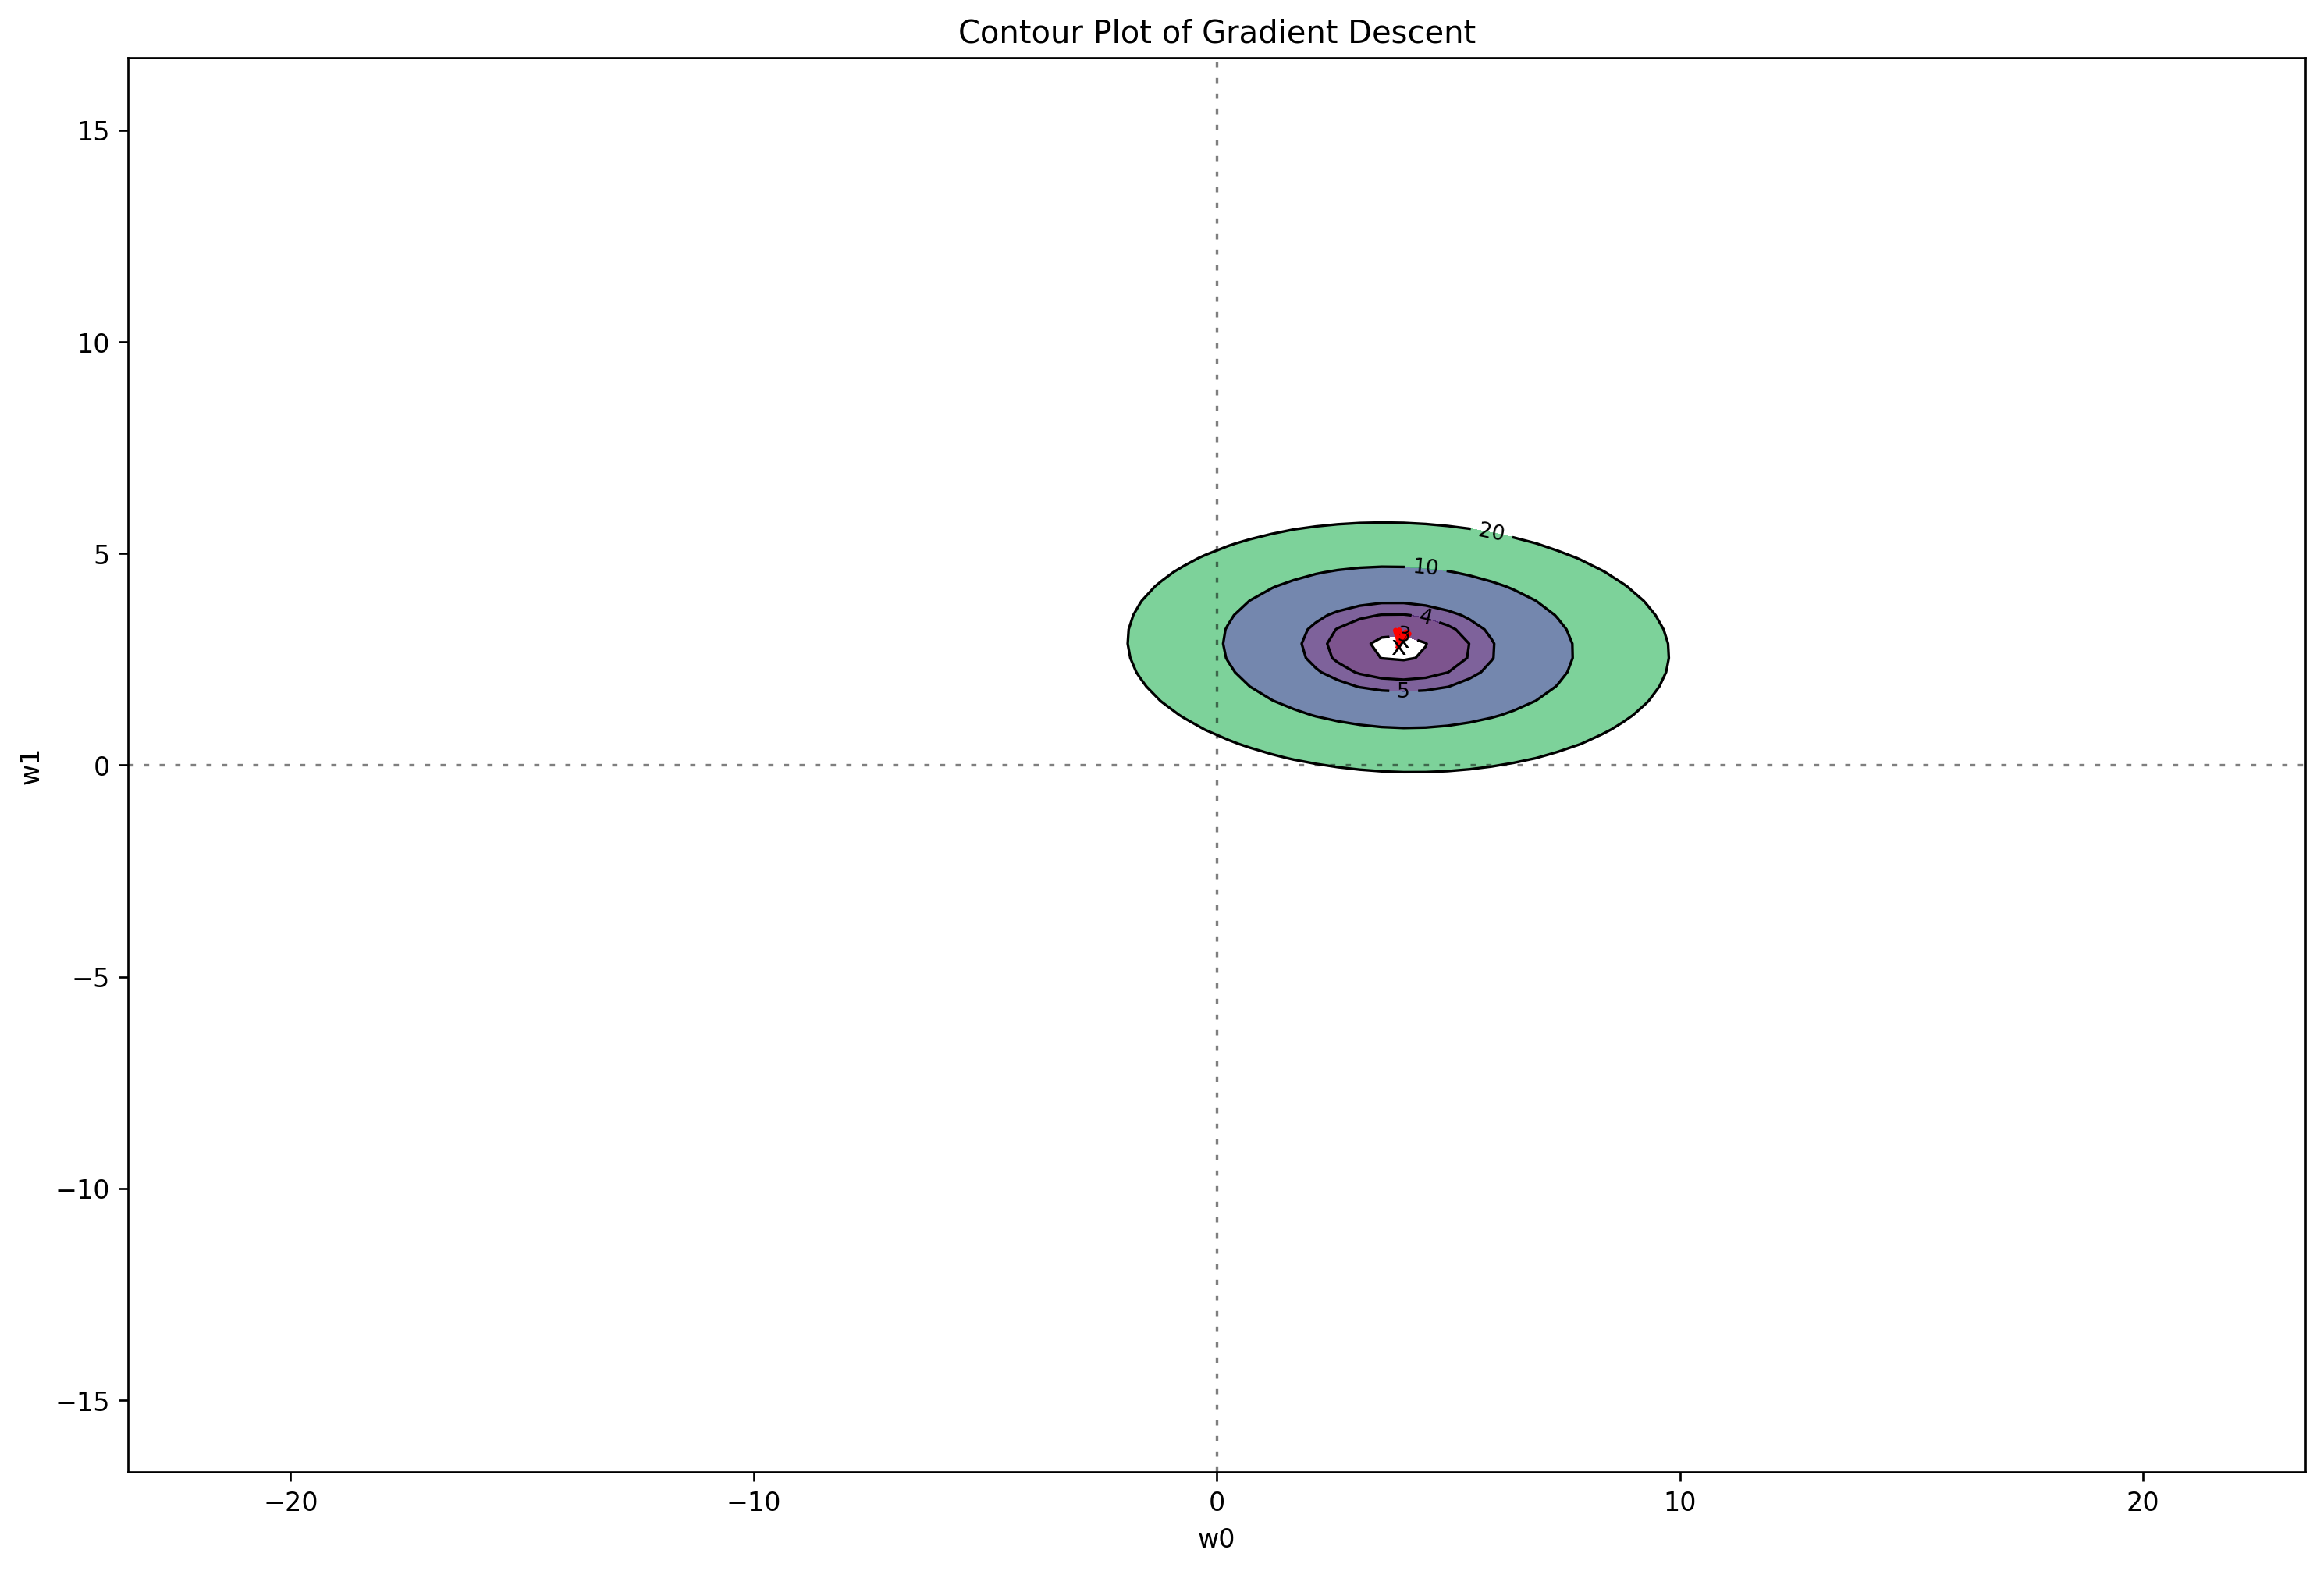

In [ ]:
plt.figure(figsize=(15,10))
plt.contourf(w0, w1, mse_vals, levels,alpha=.7)
plt.axhline(0, color='black', alpha=0.5, dashes=[2, 4],linewidth=1)
plt.axvline(0, color='black', alpha=0.5, dashes=[2, 4],linewidth=1)
for i in range(len(old_w) - 1):
    plt.annotate('x', xy=all_ws[i + 1, :], xytext=all_ws[i, :],
                 arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 2},
                 va='center', ha='center')
 
CS = plt.contour(w0, w1, mse_vals, levels, linewidths=1,colors='black')
plt.clabel(CS, inline=1, fontsize=8)
plt.title("Contour Plot of Gradient Descent")
plt.xlabel("w0")
plt.ylabel("w1")
plt.show()